In [17]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
from pandas.io.json import json_normalize

from collections import Counter
import itertools

a4_dims = (11.7, 8.27)
windows = [86400000, 604800000, 2592000000, 31536000000]
window_names = ['1 Day', '1 week', '1 month', '1 year']

In [18]:
def get_df(json_file):
    x = json.load(open(json_file))
    x = pd.DataFrame(x['views']).drop(['_id'],axis=1)
    x['time'] = pd.to_datetime(x['time'],unit='ms')
    x['index'] = pd.to_datetime(x['time'],unit='ms')
    return x

# Weighted Page Rank Results

In [38]:
def get_rank(rankings, user):
    rank = 10
    for row in rankings:
        if row['id']==user:
            return rank
        rank-=1
    return rank

def get_trajectory(user, pr):
    traj = np.asarray(list(pr['bestusers'].apply(lambda row: get_rank(row,user))))
    return traj

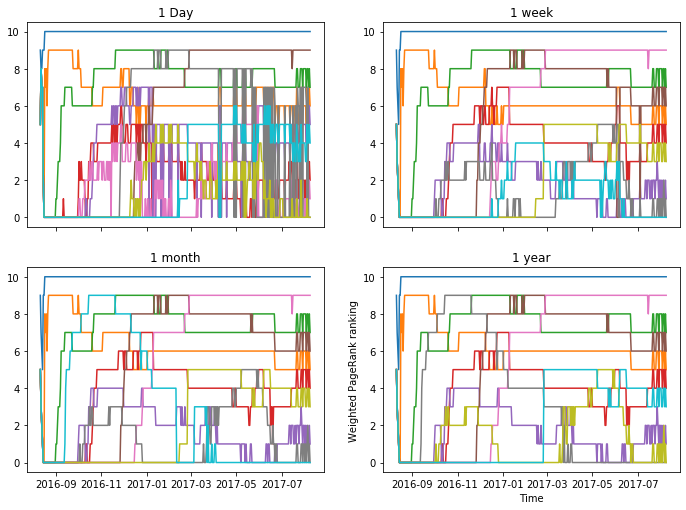

In [39]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=a4_dims, sharex=True)

file = "degree/WeightedPageRank.json"
pagerank = get_df(file).iloc[108:]

windows = [86400000, 604800000, 2592000000, 31536000000]
window_names = ['1 Day', '1 week', '1 month', '1 year']

for i, ax in enumerate(axes.flatten()):
    window = windows[i]
    name = window_names[i]
    pr = pagerank[pagerank['windowsize']==window]
    times = np.asarray(pr['time'])
    all_users = list(itertools.chain.from_iterable(pr['bestusers'].tolist()))
    unique_users = list(map(lambda y:y[0],Counter(list(map(lambda row: row['id'], all_users))).most_common(10)))
    for user in list(unique_users):
        ax.plot(times,get_trajectory(user,pr),label="User "+str(user))
    ax.set_title(name)
    
plt.xlabel('Time')
plt.ylabel('Weighted PageRank ranking')
plt.show()